In [1]:
# Import statements:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans as kms

# Data

In [2]:
# loading the dataset with pandas to generate a dataframe
rawdata = pd.read_csv("banknotes.csv")
# Using only the columns V1 and V2, as indicated by the video.
data = rawdata.iloc[:,[0,1,4]]

In [3]:
# Applying the head method to take a look at the data and his structure. 

data.head(3)

,V1,V2,Class
0,3.6216,8.6661,1
1,4.5459,8.1674,1
2,3.8660,-2.6383,1


In [4]:
data.shape

(1372, 3)

# Mean

In [5]:
np.mean(data[['V1', 'V2']])

V1    0.433735
V2    1.922353
dtype: float64

# Standard Deviation

In [6]:
np.std(data[['V1', 'V2']])

V1    2.841726
V2    5.866907
dtype: float64

# K Means

In [7]:
#Fusion

f12=np.column_stack((data.iloc[:,0],data.iloc[:,1]))

#Obtener los centroides

cen12=kms(n_clusters=2).fit(f12)

labels12=cen12.labels_

centroides12=cen12.cluster_centers_

# Stability

Genuine Banknote = GB

Forged Banknote = FB


Genuine Banknote  Calculated= GBC

Forged Banknote Calculated= FBC

$$ |GBC-GB| = |FBC-FB| $$ 

$$\%error=\frac{ |a-b|100}{a}$$

In [8]:
data.iloc[:,2].value_counts()

1    762
2    610
Name: Class, dtype: int64

In [9]:
#Calculasmos la cantidad de verdaderos y falsos a partir de la columna "class" de nuestra base de datos. 

In [10]:
#Creamos una lista con las cantidades de billetes verdaderos y falsos.

GF=list(data.iloc[:,2].value_counts())

In [11]:
# De este modo tenemos los valores para nuestras variables. 

GB=GF[0]
FB=GF[1]

In [12]:
# Obtenemos los valores calculados por KMeans, a partir de las etiquetas que generó.

GBC=list(labels12).count(0)
FBC=list(labels12).count(1)

In [13]:
#Corroboramos la igualdad mostrada en la ecuación 1 

In [14]:
abs(GBC-GB)

163

In [15]:
abs(FBC-FB)

163

In [16]:
# Calculamos el valor del error usando la ecuación 2

Error=(abs(GB-GBC)*100)/GB
Error

21.391076115485564

# Plot

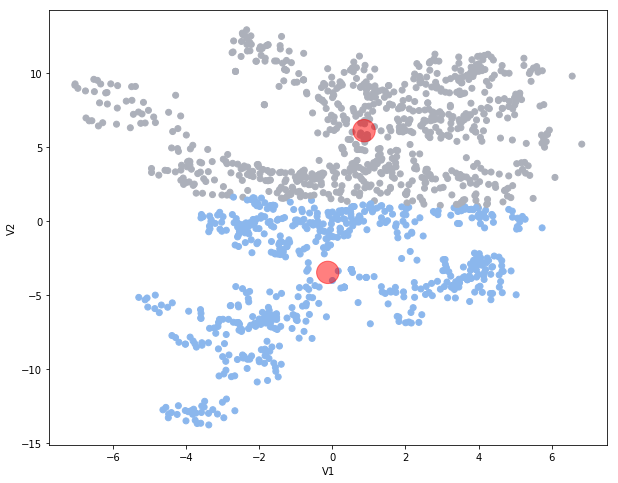

In [17]:
colores=np.array(["#8bb7ed","#acb0ba"])
plt.figure(figsize=(10,8))       # set dimensions of the figure


plt.xlabel("V1")
plt.ylabel("V2")  

plt.scatter(data.iloc[:,0],data.iloc[:,1],c=colores[labels12])

plt.scatter(centroides12[:,0],centroides12[:,1],color=["red","red"],alpha=0.5,s=500)
plt.title('Error' + '=' + str(round(Error, 2))+"%")
    #plt.savefig("figura12.png",dpi=225)

In [18]:
# Corremos varias veces KMeans para comparar el error que se genera cada vez y asi conocer su estabiidad. 

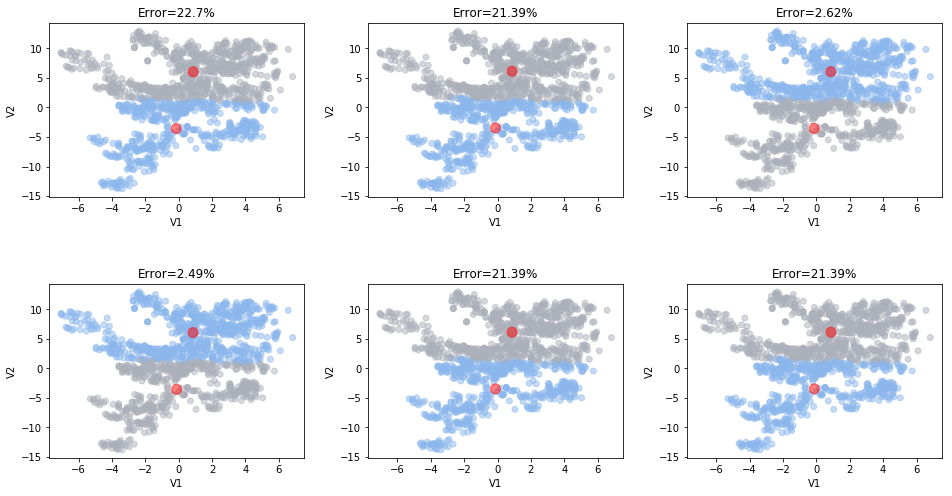

In [19]:
colores=np.array(["#8bb7ed","#acb0ba"]) #Colors
plt.figure(figsize=(16,8))       # set dimensions of the figure


for i in range (1,7):
    #KMeans
    cen12=kms(n_clusters=2).fit(f12)
    labels12=cen12.labels_ #labels
    centroides12=cen12.cluster_centers_#Centroids

    
    plt.subplot(2,3, i)  # aubplot
    
    plt.subplots_adjust(wspace=0.25, # wspace controls the width of space between subplots
                    hspace=0.5)
    
    #axis name
    plt.xlabel("V1")
    plt.ylabel("V2")

    #Calculo del error      
    GBC=list(labels12).count(0)
    FBC=list(labels12).count(1)
    Error=(abs(GB-GBC)*100)/GB
    
    #plot data
    plt.scatter(data.iloc[:,0],data.iloc[:,1],c=colores[labels12],alpha=0.5)
    
    #plot centroids
    plt.scatter(centroides12[:,0],centroides12[:,1],color=["red","red"],alpha=0.5,s=100)
    
    #plot title
    plt.title('Error' + '=' + str(round(Error, 2))+"%")



# Conclusions